### Extra credit (5 points)

In this exercise we will deal with facial images. 

The Olivetti dataset consists of 400 photos taken from 40 people (so there are 10 photos of each person). Even though the photos represent the same person, each photo has been taken at different times during the day, with different light and facial expressions or details (for example, with glasses and without). The images are 64 x 64 pixels, so unfolding all the pixels into features creates a dataset made of 400 cases and 4,096 variables.

Because the dataset has a high dimensionality (4,096 dimensions to be exact), to process the images will be time consuming. We will first use PCA to reduce the dimensionality of the dataset to improve efficiency. We will then perform a classification on the reduced dataset.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=101)
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [2]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

The target of the dataset stores the IDs of the persons.

In [3]:
faces.target[:10]

array([ 3, 38, 27, 18, 19, 20, 13, 11, 18, 16])

Let's display the first 10 images. This has been doen for you.

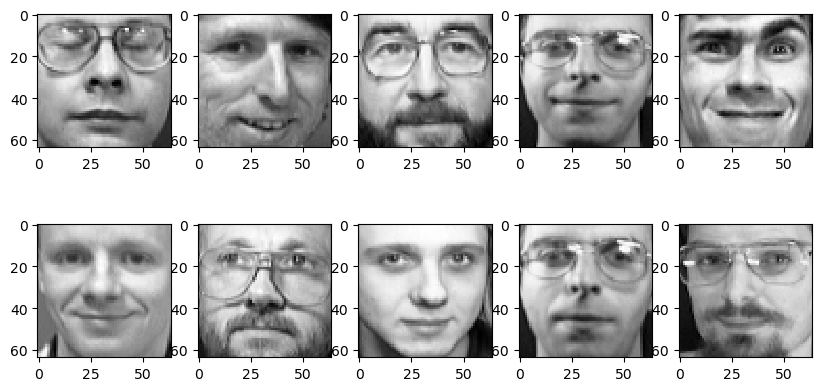

In [4]:
import matplotlib.pyplot as plt 

fig = plt.gcf() # get current figure
fig.set_size_inches(10, 5)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(faces.images[i], cmap=plt.cm.gray, interpolation='nearest')
    
plt.show()

Note that observations 4 and 9 are the same person (person 18 in the target data).

#### Decorrelation
#### Instructions (1 point)
- create a PCA object
- fit the PCA model using `faces.data`
- print out the explained variance of the first 50 principal components

In [11]:
from sklearn.decomposition import PCA

# create a PCA object
model = PCA()

# fit the PCA model using `faces.data`
model.fit(faces.data)

# print out the explained variance of the first 50 principal components
print(model.explained_variance_[:50])

[18.840187   11.071757    6.3046184   3.954589    2.8560438   2.4977114
  1.9200654   1.6111581   1.5492225   1.3229506   1.2621076   1.1369108
  0.98639834  0.90758985  0.8409289   0.77355367  0.72714305  0.6452661
  0.5964512   0.5910004   0.5527014   0.48628193  0.46199223  0.45075318
  0.43213564  0.42079377  0.40652165  0.39230004  0.36209515  0.34905592
  0.318056    0.30396354  0.28636885  0.26468372  0.2534789   0.2500454
  0.2414267   0.23627412  0.22322461  0.2167888   0.20552662  0.20095238
  0.19348116  0.18975668  0.18267612  0.17913836  0.17586884  0.17441018
  0.16529442  0.16217871]


#### creating a plot of explained variances
#### Instructions (0.5 point)
- make a bar plot using `features` as the x axis and the first 50 explained variances as the y axis

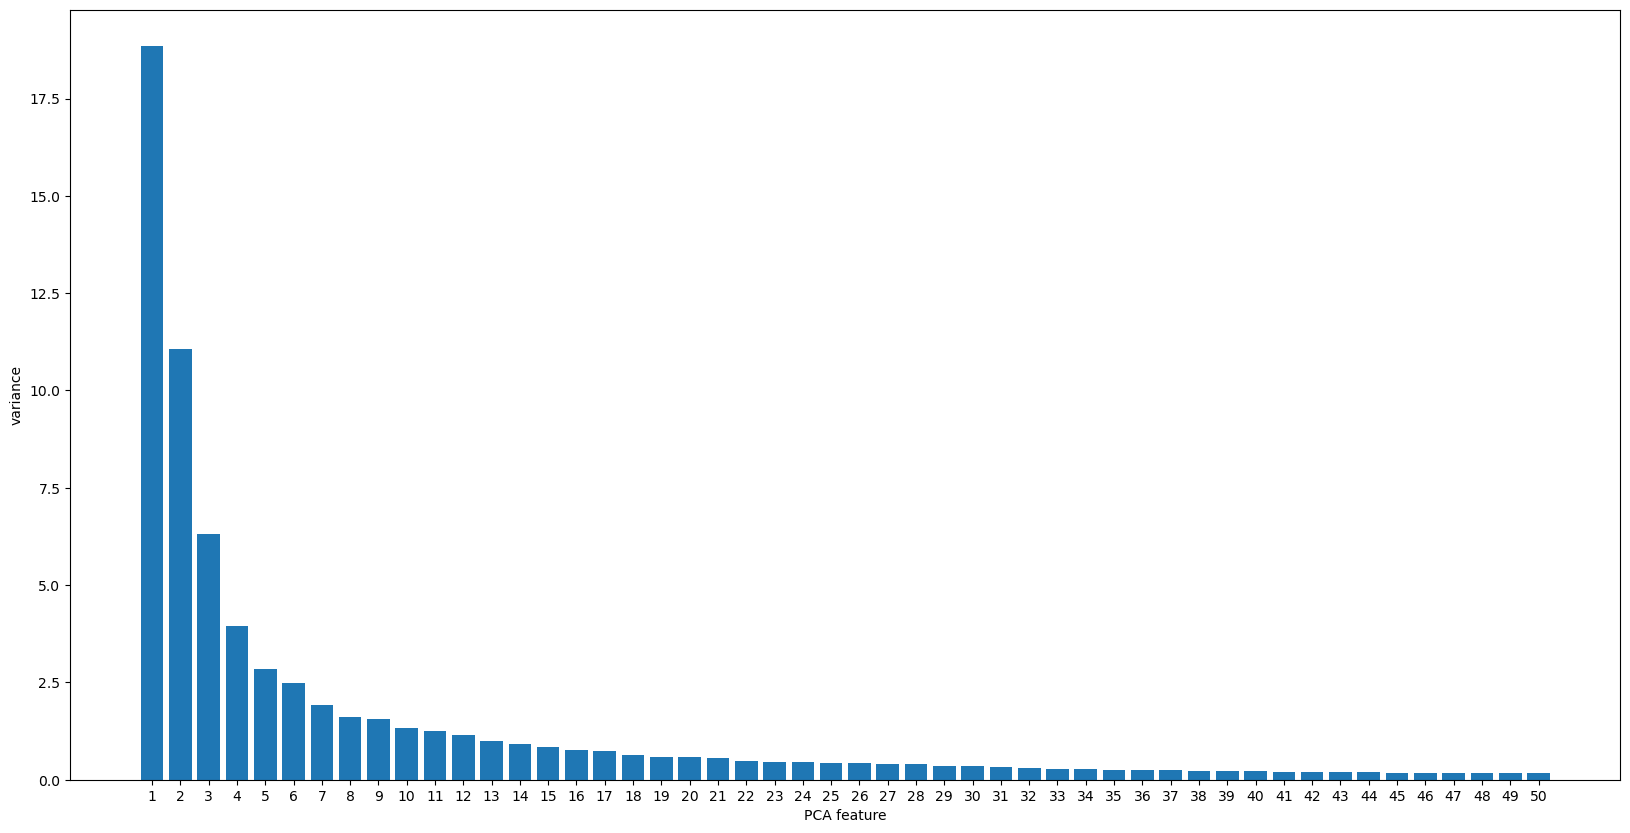

In [12]:
features = range(1, 1 + 50)
fig = plt.gcf() # get current figure
fig.set_size_inches(20, 10)

# make a bar plot using `features` as the x axis and the first 50 explained variances as the y axis
plt.bar(features, model.explained_variance_[:50])
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#### Instructions (0.5 point)
- calculate the cumulative explained variance ratio of the first 50 principal components

In [ ]:
import numpy as np
print(np.cumsum(model.explained_variance_ratio_[:50]))

[0.23812734 0.37806708 0.4577532  0.5077365  0.54383504 0.5754044
 0.59967273 0.6200367  0.63961786 0.65633905 0.6722913  0.68666106
 0.69912845 0.7105998  0.72122854 0.7310057  0.74019635 0.7483521
 0.75589085 0.7633607  0.77034646 0.7764927  0.782332   0.78802925
 0.7934912  0.7988097  0.80394787 0.80890626 0.8134829  0.8178947
 0.82191473 0.8257566  0.8293761  0.83272153 0.83592534 0.83908576
 0.8421372  0.8451236  0.847945   0.85068506 0.85328275 0.8558227
 0.85826814 0.8606665  0.8629754  0.8652396  0.86746246 0.8696669
 0.8717561  0.8738059 ]


#### Reduce the dimensionality of the dataset
#### Instructions (1 point)
- create a PCA object with 25 components
- fit the model with `faces.data`
- transform the original data using the model
- print out the shape of the transformed data

In [ ]:
# create a PCA object with 25 components
model = PCA(n_components=25)
# fit the model with `faces.data`
model.fit(faces.data)
# transform the original data using the model
transformed_data = model.transform(faces.data)
# print out the shape of the transformed data
transformed_data.shape

(400, 25)

Now let's perform a classification based on the transformed data with reduced dimensionality (from 4,096 to only 25 dimensions). We will use the first 300 observations to train the classifier and use the remaining 100 observations to test the classifier.
#### Instructions
- create a knn classifier with 5 neighbors
- fit the knn model using the first 300 observations of `transformed_data` and the `target` of `faces`
- predict the label of the last 100 observations of `transformed_data`
- print out the accuracy score based on the 100 predicted labels and the last 100 `target` of `faces`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# create a knn classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
# fit the knn model using the first 300 observations of `transformed_data` and the `target` of `faces`
knn.fit(transformed_data[:300], faces.target[:300])
# predict the label of the last 100 observations of `transformed_data``
pred = knn.predict(transformed_data[-100:])

from sklearn.metrics import accuracy_score
# print out the accuracy score based on the 100 predicted labels and the last 100 `target` of `faces`
print("The accuracy based on the dimensionality-reduced data is: ", accuracy_score(pred, faces.target[-100:]))

The accuracy based on the dimensionality-reduced data is:  0.83


Compare this with the classification result based on the original dataset - which has 4,096 features.
#### Instructions (1 point)
- create a knn classifier with 5 neighbors
- fit the knn model using the first 300 observations of the original data and the `target` of `faces`
- predict the label of the last 100 observations of the origial data
- print out the accuracy score based on the 100 predicted labels and the the last 100 `target` of `faces`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(faces.data[:300], faces.target[:300])
pred = knn.predict(faces.data[-100:])

print("The accuracy based on the origial data is: ", accuracy_score(pred, faces.target[-100:]))

The accuracy based on the origial data is:  0.84


Comparing the two, it seems that the classification accuracy based on the reduced data is almost as good as the one based on the original data!